In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time



In [2]:
pred=pd.read_csv('pred_lr2.csv')
valid=pd.read_csv('validation.csv')

In [5]:
pred=pred['pre_click_final']

In [11]:
pred

0         0.000227
1         0.000141
2         0.000095
3         0.000079
4         0.000098
5         0.000441
6         0.000426
7         0.000580
8         0.000133
9         0.000127
10        0.000397
11        0.000148
12        0.000190
13        0.000258
14        0.000782
15        0.000235
16        0.000163
17        0.000147
18        0.001019
19        0.000105
20        0.000479
21        0.000398
22        0.000253
23        0.000265
24        0.002171
25        0.000687
26        0.000034
27        0.000465
28        0.000032
29        0.000229
            ...   
303895    0.006614
303896    0.000089
303897    0.001551
303898    0.000940
303899    0.000429
303900    0.002976
303901    0.000256
303902    0.000647
303903    0.000082
303904    0.000096
303905    0.000308
303906    0.000173
303907    0.000073
303908    0.000269
303909    0.000217
303910    0.001167
303911    0.000577
303912    0.000375
303913    0.001064
303914    0.000056
303915    0.000481
303916    0.

In [12]:
avgCTR=0.0007375623256619447
bids = []
base_bids = np.arange(1,302,2)
for base_bid in base_bids:
    for i in range(0, len(pred)):
        bid = base_bid * (pred[i] / avgCTR)
        bids.append(bid)                  


In [13]:
bid_for_basebid = [bids[x:x+len(pred)] for x in range(0, len(bids), len(pred))]

In [14]:
# Bidding function
def linearbidding(bids):
    impression = 0
    clicks = 0
    cost = 0  
    budget = 6250*1000   
    
    win_check = bids >= valid.payprice
    for i in range(0,len(win_check)):
            if win_check[i]==True:
                impression += 1
                clicks += valid.click[i]
                cost += valid.payprice[i]
            if cost >= budget:
                break
    return impression, clicks, cost


bid_final = pd.DataFrame()
bid_final['bid'] = base_bids

imp = []
clks = []
costs = []

for bids in bid_for_basebid:
    [impressions, clicks, cost] = linearbidding(bids)
    imp.append(impressions)
    clks.append(clicks)
    costs.append(cost)

bid_final['imps_won'] = imp
bid_final.imps_won = bid_final.imps_won.astype(int)
bid_final['spend'] = costs
bid_final['clicks'] = clks
bid_final['CTR'] = (bid_final.clicks/bid_final.imps_won * 100).round(4).astype(str)
bid_final['CPM'] = (bid_final.spend/bid_final.imps_won * 1000).round(2).astype(str)
bid_final['CPC'] = (bid_final.spend/bid_final.clicks).round(2).astype(str)


Text(0,0.5,'clicks')

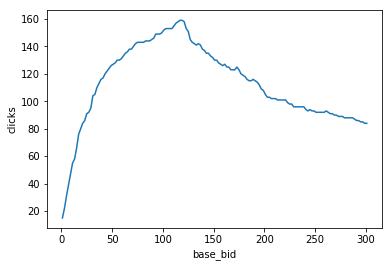

In [16]:
plt.plot(bid_final.bid,bid_final.clicks)
plt.xlabel('base_bid')
plt.ylabel('clicks')


In [19]:
aa=bid_final.clicks

In [20]:
aa.max()

159